In [1]:
# vh, cp = ("P2_NIK_2022-08-20_13-40-09.eeg/P2_NIK_2022-08-20_13-40-09.vhdr",
#           "/Users/neverix/Documents/code/py/image-event-related-potentials/data/134001_stim_cola_2022-08-20_13h39.53.146.csv")
vh, cp = ("P3_EUG_2022-08-20_14-24-02.eeg/P3_EUG_2022-08-20_14-24-02.vhdr",
           "data/135001_stim_cola_2022-08-20_14h23.45.214.csv")
# vh, cp = ("P4_SAS_2022-08-20_15-00-06.cnt/P4_SAS_2022-08-20_15-00-06.cnt",
#           "/Users/neverix/Documents/code/py/image-event-related-potentials/data/136001_stim_cola_2022-08-20_14h47.03.817.csv")

In [2]:
import mne.io
try:
    data = mne.io.read_raw_brainvision(vh)
except OSError:
    try:
        data = mne.io.read_raw_cnt(vh)
    except UnicodeDecodeError:
        print(":p")

Extracting parameters from P3_EUG_2022-08-20_14-24-02.eeg/P3_EUG_2022-08-20_14-24-02.vhdr...
Setting channel info structure...


<ipython-input-2-a6dd01461878>:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_brainvision(vh)


Reading 0 ... 151583  =      0.000 ...   148.030 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 3e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 300.00 Hz
- Upper transition bandwidth: 75.00 Hz (-6 dB cutoff frequency: 337.50 Hz)
- Filter length: 33793 samples (33.001 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.3s finished


Using matplotlib as 2D backend.


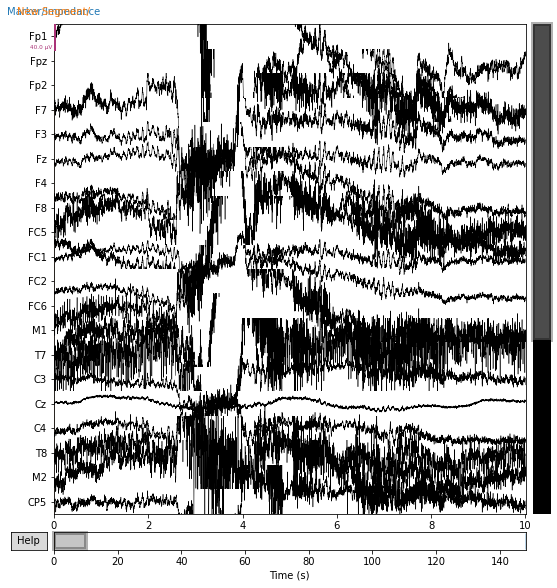

Effective window size : 2.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


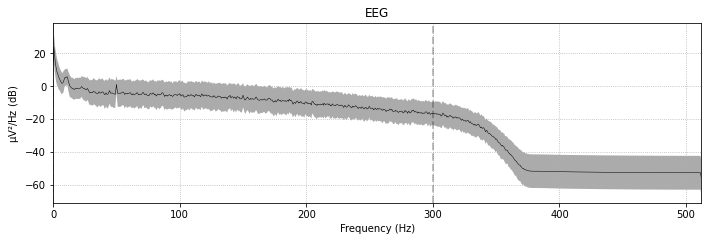

In [3]:
data = data.load_data().filter(0.1, 300)
data = data.drop_channels([e for i, e in enumerate(data.ch_names) if data._data[i, :].max() < 1e-16])

import mne.viz
mne.viz.plot_raw(data)
data.plot_psd(average=True)

import numpy as np
cl = 1e-3
data = data.apply_function(lambda x: np.clip(x, -cl, cl))

In [6]:
import pandas as pd
df = pd.read_csv(cp)
df = df[df.img.apply(lambda x: not isinstance(x, float))]
import datetime
datetimes = [data.info["meas_date"] + datetime.timedelta(seconds=time) for time in data.times]
df, datetimes[:10]

(               img  trials_2.thisRepN  trials_2.thisTrialN  trials_2.thisN  \
 1   lays/lays1.jpg                0.0                  0.0             0.0   
 2   lays/lays6.png                0.0                  0.0             0.0   
 3   lays/lays5.png                0.0                  0.0             0.0   
 4   lays/lays4.png                0.0                  0.0             0.0   
 5   lays/lays7.png                0.0                  0.0             0.0   
 ..             ...                ...                  ...             ...   
 90  lays/lays5.png                4.0                  0.0             4.0   
 91  lays/lays2.png                4.0                  0.0             4.0   
 92  lays/lays1.jpg                4.0                  0.0             4.0   
 93  lays/lays4.png                4.0                  0.0             4.0   
 94  lays/lays1.jpg                4.0                  0.0             4.0   
 
     trials_2.thisIndex  trials.thisRepN  trials.t

ayo
n


<ipython-input-7-13c692821349>:41: RuntimeWarning: filter_length (1691) is longer than the signal (615), distortion is likely. Reduce filter length or filter a longer signal.
  e = e.filter(0, 4)  # , filter_length=512)


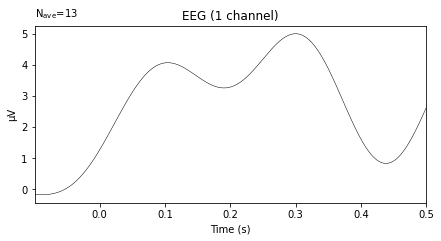

y
lays/lays1.jpg
n


<ipython-input-7-13c692821349>:41: RuntimeWarning: filter_length (1691) is longer than the signal (615), distortion is likely. Reduce filter length or filter a longer signal.
  e = e.filter(0, 4)  # , filter_length=512)


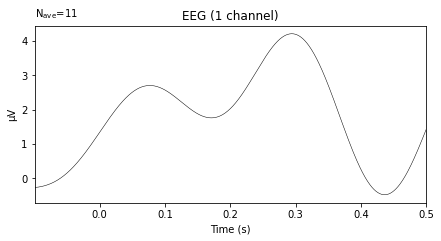

y


<ipython-input-7-13c692821349>:41: RuntimeWarning: filter_length (1691) is longer than the signal (615), distortion is likely. Reduce filter length or filter a longer signal.
  e = e.filter(0, 4)  # , filter_length=512)


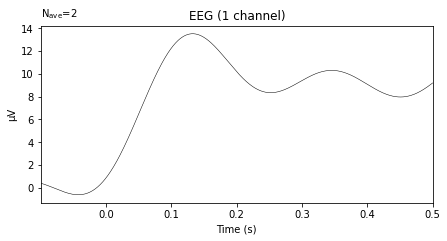

lays/lays2.png
n


<ipython-input-7-13c692821349>:41: RuntimeWarning: filter_length (1691) is longer than the signal (615), distortion is likely. Reduce filter length or filter a longer signal.
  e = e.filter(0, 4)  # , filter_length=512)


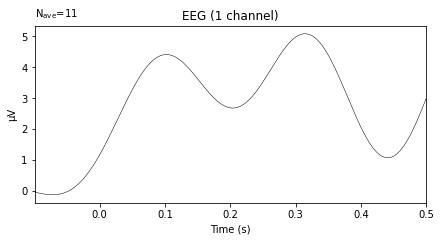

y


<ipython-input-7-13c692821349>:41: RuntimeWarning: filter_length (1691) is longer than the signal (615), distortion is likely. Reduce filter length or filter a longer signal.
  e = e.filter(0, 4)  # , filter_length=512)


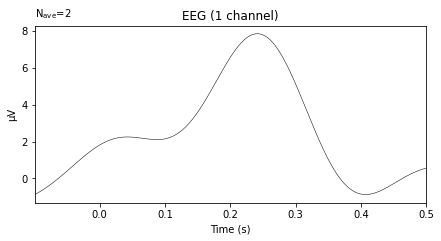

lays/lays3.png
n


<ipython-input-7-13c692821349>:41: RuntimeWarning: filter_length (1691) is longer than the signal (615), distortion is likely. Reduce filter length or filter a longer signal.
  e = e.filter(0, 4)  # , filter_length=512)


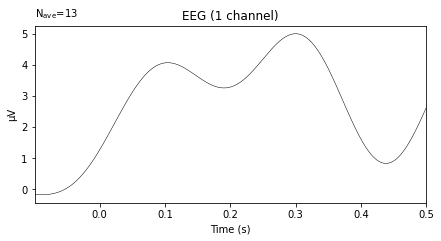

<ipython-input-7-13c692821349>:41: RuntimeWarning: filter_length (1691) is longer than the signal (615), distortion is likely. Reduce filter length or filter a longer signal.
  e = e.filter(0, 4)  # , filter_length=512)


y
lays/lays4.png
n


<ipython-input-7-13c692821349>:41: RuntimeWarning: filter_length (1691) is longer than the signal (615), distortion is likely. Reduce filter length or filter a longer signal.
  e = e.filter(0, 4)  # , filter_length=512)


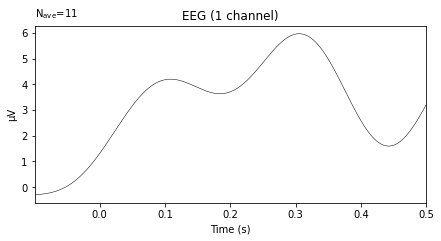

y


<ipython-input-7-13c692821349>:41: RuntimeWarning: filter_length (1691) is longer than the signal (615), distortion is likely. Reduce filter length or filter a longer signal.
  e = e.filter(0, 4)  # , filter_length=512)


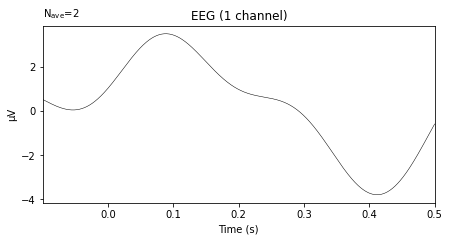

lays/lays5.png
n


<ipython-input-7-13c692821349>:41: RuntimeWarning: filter_length (1691) is longer than the signal (615), distortion is likely. Reduce filter length or filter a longer signal.
  e = e.filter(0, 4)  # , filter_length=512)


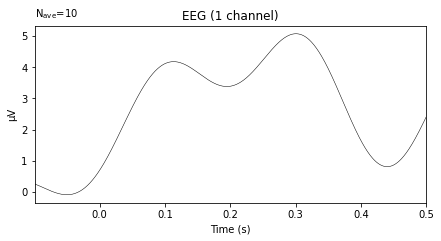

y


<ipython-input-7-13c692821349>:41: RuntimeWarning: filter_length (1691) is longer than the signal (615), distortion is likely. Reduce filter length or filter a longer signal.
  e = e.filter(0, 4)  # , filter_length=512)


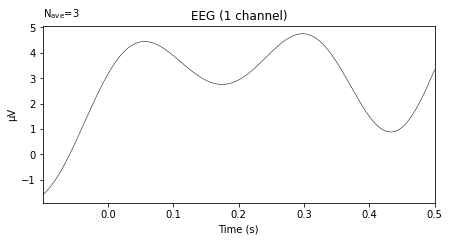

lays/lays6.png
n


<ipython-input-7-13c692821349>:41: RuntimeWarning: filter_length (1691) is longer than the signal (615), distortion is likely. Reduce filter length or filter a longer signal.
  e = e.filter(0, 4)  # , filter_length=512)


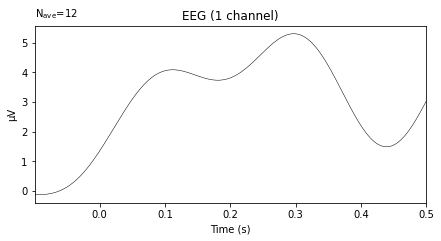

y


<ipython-input-7-13c692821349>:41: RuntimeWarning: filter_length (1691) is longer than the signal (615), distortion is likely. Reduce filter length or filter a longer signal.
  e = e.filter(0, 4)  # , filter_length=512)


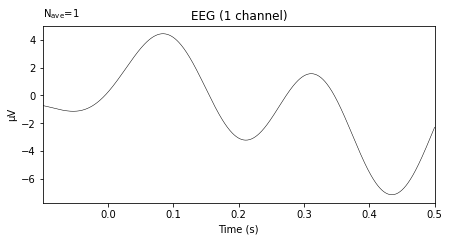

lays/lays7.png
n


<ipython-input-7-13c692821349>:41: RuntimeWarning: filter_length (1691) is longer than the signal (615), distortion is likely. Reduce filter length or filter a longer signal.
  e = e.filter(0, 4)  # , filter_length=512)


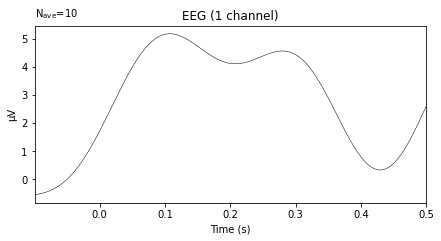

y


<ipython-input-7-13c692821349>:41: RuntimeWarning: filter_length (1691) is longer than the signal (615), distortion is likely. Reduce filter length or filter a longer signal.
  e = e.filter(0, 4)  # , filter_length=512)


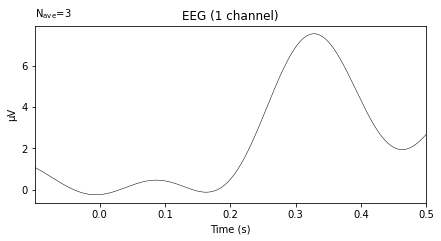

In [7]:
from matplotlib import pyplot as plt
import datetime
import random
import bisect
import pytz
mne.set_log_level(verbose=False)
tss = []
for pick_item in ["ayo"] + sorted(set(df["img"].tolist())):
    print(pick_item)
    ts = []
    for k in ("n", "y"):
        print(k)
        events = [pytz.UTC.localize(datetime.datetime.strptime(x + "000", "%Y-%m-%d_%Hh%M.%S.%f"))
                  + datetime.timedelta(seconds=float(y))
                  for _, x, y in (df
    #                               [df["key_resp.keys"] == k]
                                  [(df["img"] == pick_item if k == "y" else df["img"] != pick_item)]
                              [["date", "image.started"]].itertuples())
                                  if isinstance(x, str) and ("nan" not in str(y).lower())]
        events = [(min(len(datetimes) - 1, bisect.bisect_left(datetimes, e)
                                  ), 0, i) for i, e in enumerate(events)]
        if not events:
            continue
        d = data.copy()  # .filter(1, 4)   # .filter(0, 50)  #  .filter(1, 300)
        d.set_eeg_reference("average")
        d = d.drop_channels([d.ch_names[(d.get_data() ** 2).mean(axis=-1).mean(axis=0).argmax()]])
        epoched = mne.Epochs(d,
                             events,
                             reject=dict(eeg=1e-4),
                             tmin=-0.1, tmax=0.5
                            )
#         mne.viz.plot_epochs(epoched)
        e = epoched.load_data().pick_channels("Oz".split())
#         keep = []
#         for i, t in enumerate(e):
#             keep.append(i)
#             e.info["bads"].append(i)
#         epoched
#         print(e)
        try:
            e = e.filter(0, 4)  # , filter_length=512)
            ts.append(e.average())
            e.average().plot()
        except (ZeroDivisionError, ValueError):
            continue
#         print(e.drop_bad())
#     break
    if len(ts) == 2:
        tss.append((pick_item, (ts[1]._data - ts[0]._data).T, ts[1].ch_names))

lays/lays1.jpg
lays/lays2.png
lays/lays4.png
lays/lays5.png
lays/lays6.png
lays/lays7.png


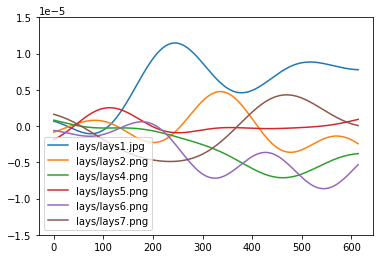

In [9]:
for name, x, leg in tss:
    print(name)
    plt.ylim([-1.5e-5, 1.5e-5])
    plt.plot(x.mean(axis=-1), label=name)
#     for y, l in zip(x.T, leg):
#         plt.plot(y, label=l)
#     plt.legend()
#     plt.show()
plt.legend()
plt.savefig("p300eug.svg")
plt.show()

In [11]:
!cp /Users/neverix/Downloads/Clean\ visualizer.py app.py
!code .